In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # Original HMM (uses hmmlearn)
# from hmmlearn import hmm
# S = hmm.GaussianHMM(3, covariance_type='full')

# S.startprob_ = np.array([0.1, 0.6, 0.3])
# S.transmat_ = np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]])
# S.means_ = np.array([[0, 5],[-1, -1],[-1, 3]])
# S.covars_ = np.array([
#     [[0.1, -0.5],
#      [-0.5, 3]],
#     [[0.6, 0.7],
#      [0.7, 1]],
#     [[1, 0],
#      [0, 1]]
#     ])

# obs, states = S.sample(300)
# np.savetxt('sample.txt', obs)

In [3]:
# copies from above
OG_means = np.array([[0, 5],[-1, -1],[-1, 3]])
OG_covars = np.array([
    [[0.1, -0.5],
     [-0.5, 3]],
    [[0.6, 0.7],
     [0.7, 1]],
    [[1, 0],
     [0, 1]]
    ])

In [4]:
data = np.loadtxt('sample.txt')

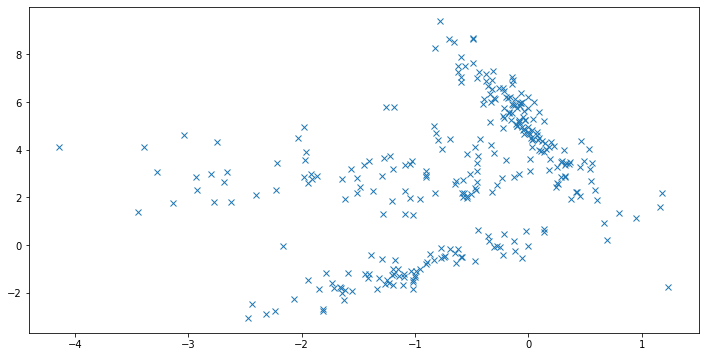

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.facecolor'] = 'w'
rcParams['legend.edgecolor'] = 'k'

plt.plot(data[:, 0], data[:, 1], 'x')
plt.show()

In [6]:
from edhsmm.hsmm_base import GaussianHSMM
R = GaussianHSMM(n_states = 3, n_durations = 20, rnd_state = 42)

In [7]:
R.fit(data, censoring = 1)   # fast for hsmm_core_x

FIT: reestimation complete for 1th loop.
FIT: reestimation complete for 2th loop.
FIT: reestimation complete for 3th loop.
FIT: reestimation complete for 4th loop.
FIT: reestimation complete for 5th loop.
FIT: reestimation complete for 6th loop.
FIT: reestimation complete for 7th loop.
FIT: reestimation complete for 8th loop.
FIT: reestimation complete for 9th loop.
FIT: reestimation complete for 10th loop.
FIT: reestimation complete for 11th loop.
FIT: reestimation complete for 12th loop.
FIT: reestimation complete for 13th loop.
FIT: converged at 14th loop.


In [8]:
# comparison
print("Original Means:\n", OG_means, "\n")
print("Original Covariance Matrices:\n", OG_covars, "\n")

print("Learned Means:\n", R.mean, "\n")
print("Learned Covariance Matrices:\n", R.covmat)

Original Means:
 [[ 0  5]
 [-1 -1]
 [-1  3]] 

Original Covariance Matrices:
 [[[ 0.1 -0.5]
  [-0.5  3. ]]

 [[ 0.6  0.7]
  [ 0.7  1. ]]

 [[ 1.   0. ]
  [ 0.   1. ]]] 

Learned Means:
 [[-0.04996589  5.20062977]
 [-0.99658955 -0.96648514]
 [-1.14512311  3.00548263]] 

Learned Covariance Matrices:
 [[[ 0.10807261 -0.53558802]
  [-0.53558802  3.05676116]]

 [[ 0.49309206  0.61393543]
  [ 0.61393543  0.91264995]]

 [[ 1.1154796   0.01927677]
  [ 0.01927677  1.13738244]]]
